In [7]:
# import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Metadata

In [2]:
dfm = pd.read_csv('../data/item_metadata.csv',dtype="str", sep=",", encoding="utf-8")
dfm_stack = dfm.set_index('item_id', drop=False, append=True).properties.str.split('|', expand=True).stack()
dfm.head()

,item_id,properties
0,5101,Satellite TV|Golf Course|Airport Shuttle|Cosme...
1,5416,Satellite TV|Cosmetic Mirror|Safe (Hotel)|Tele...
2,5834,Satellite TV|Cosmetic Mirror|Safe (Hotel)|Tele...
3,5910,Satellite TV|Sailing|Cosmetic Mirror|Telephone...
4,6066,Satellite TV|Sailing|Diving|Cosmetic Mirror|Sa...


In [3]:
dfm_sparse = pd.get_dummies(dfm_stack, prefix=None, prefix_sep=None).groupby(level=1, sort=False).agg(max)
dfm_sparse.head()

,1 Star,2 Star,3 Star,4 Star,5 Star,Accessible Hotel,Accessible Parking,Adults Only,Air Conditioning,Airport Hotel,...,Terrace (Hotel),Theme Hotel,Towels,Very Good Rating,Volleyball,Washing Machine,Water Slide,Wheelchair Accessible,WiFi (Public Areas),WiFi (Rooms)
item_id,,,,,,,,,,,,,,,,,,,,,
5101,0,0,0,1,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,1,1
5416,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,1
5834,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1
5910,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
6066,0,0,0,1,0,1,1,0,0,0,...,1,0,1,0,1,0,0,1,1,1


In [4]:
dfm_sparse.describe()

,1 Star,2 Star,3 Star,4 Star,5 Star,Accessible Hotel,Accessible Parking,Adults Only,Air Conditioning,Airport Hotel,...,Terrace (Hotel),Theme Hotel,Towels,Very Good Rating,Volleyball,Washing Machine,Water Slide,Wheelchair Accessible,WiFi (Public Areas),WiFi (Rooms)
count,927142.000000,927142.000000,927142.000000,927142.000000,927142.000000,927142.000000,927142.000000,927142.000000,927142.000000,927142.000000,...,927142.000000,927142.000000,927142.000000,927142.000000,927142.000000,927142.000000,927142.000000,927142.000000,927142.000000,927142.000000
mean,0.008532,0.068809,0.138687,0.056324,0.011535,0.058365,0.073649,0.015415,0.381059,0.013424,...,0.264690,0.009859,0.046112,0.406266,0.034962,0.226014,0.000376,0.148397,0.430945,0.503728
std,0.091972,0.253130,0.345620,0.230546,0.106782,0.234433,0.261199,0.123197,0.485647,0.115082,...,0.441168,0.098804,0.209727,0.491136,0.183684,0.418249,0.019398,0.355493,0.495209,0.499986
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
dfm_sparse.sum().sort_values(ascending=False)

Satisfactory Rating             533286
Car Park                        487879
Good Rating                     481910
WiFi (Rooms)                    467027
Shower                          426875
Television                      425953
WiFi (Public Areas)             399547
Hotel                           379321
Very Good Rating                376666
Air Conditioning                353296
House / Apartment               352254
Openable Windows                348151
Non-Smoking Rooms               346035
Free WiFi (Combined)            318894
Central Heating                 315101
Fridge                          304854
Hairdryer                       300873
Free WiFi (Rooms)               293882
Desk                            276219
Free WiFi (Public Areas)        269060
Luxury Hotel                    262400
From 2 Stars                    250965
Self Catering                   248731
Business Hotel                  245433
Terrace (Hotel)                 245405
Telephone                

## Sessions

In [3]:
df_train = pd.read_csv('../data/train.csv', sep=",", encoding="utf-8")
df_train['user_session'] = df_train['user_id'] + df_train['session_id']

In [5]:
print('Number of entries: ', len(df_train))
print('Number of different users: ', len(df_train.user_id.unique()))
print('Number of different sessions: ', len(df_train.user_session.unique()))

Number of entries:  15932992
Number of different users:  730803
Number of different sessions:  910683


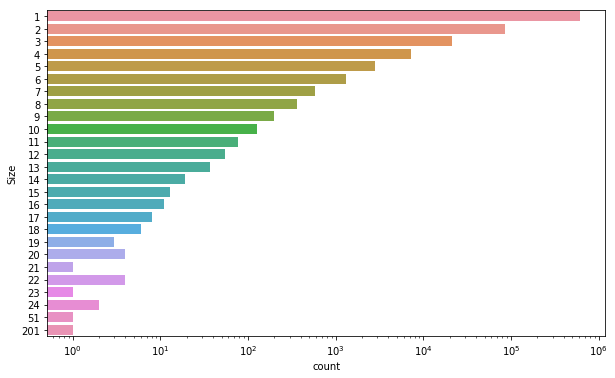

In [7]:
df_number_sessions_per_user = df_train[['user_id', 'session_id']].drop_duplicates().pivot_table(index=['user_id'], aggfunc='count')
f, ax = plt.subplots(figsize=(10, 6))
g = sns.countplot(y='session_id', data=df_number_sessions_per_user, ax=ax)
plt.ylabel('Size')
g.set_xscale('log')
df_number_sessions_per_user.describe()
plt.savefig('session')

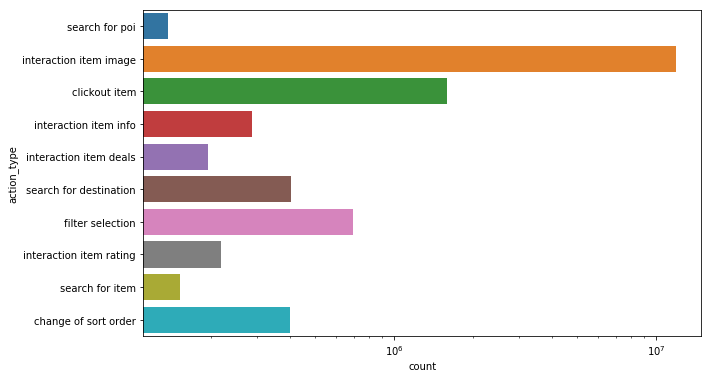

In [9]:
_, ax = plt.subplots(figsize=(10, 6))
g = sns.countplot(y='action_type', data=df_train, ax=ax)
g.set_xscale('log')

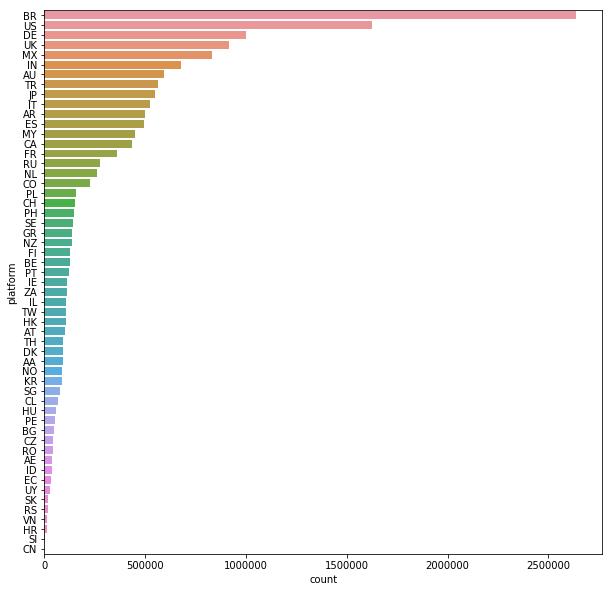

In [13]:
_, ax = plt.subplots(figsize=(10, 10))
sns.countplot(y='platform', data=df_train, ax=ax, order = df_train['platform'].value_counts().index)

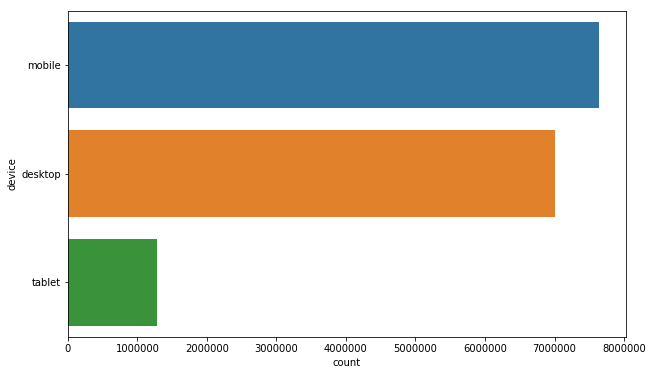

In [10]:
_, ax = plt.subplots(figsize=(10, 6))
sns.countplot(y='device', data=df_train, ax=ax);